# Homework (16 pts) - Hypothesis Testing

In [6]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

1. You measure the duration of high frequency bursts of action potentials under two different experimental conditions (call them conditions A and B). Based on your measured data below, determine if the conditions affect the mean burst duration or if differences are just due to random fluctuations? See 1a-d below.

In [7]:
burstDurationsA_ms = np.array([180.38809356, 118.54316518,  47.36070342, 258.43152543,
       157.58441772,  53.00241256,  97.87549106,  98.58339172,
         3.82151168, 149.63437886,  78.36434292, 207.1499196 ,
       249.99308288,  52.33575872, 177.16295745,  20.90902826,
       355.53831638,  17.14676607, 194.82448255, 364.30099202,
        10.46025411,  63.80995802, 186.96964679,  16.76391482,
        66.04825185, 169.95991378, 174.85051452,  95.51534595,
       164.81818483, 165.92316127,  21.99840476, 176.27450914,
       367.20238806,  53.55081561,  18.54310649, 309.36915353,
        34.8110391 , 170.70514854,   4.80755719, 185.70861565,
        42.81031454,  77.63480453,  22.78673497,  27.15480627,
        81.19289909,   7.5754338 , 143.53588895,   1.45355329,
        56.93153072,  35.7227909 , 120.88947208, 268.68459917,
        36.56451611, 335.29492244,  18.88246351, 698.21607381,
        47.24456065,  68.47935918, 246.50352868,  39.17939247,
       130.00962739,  12.63485608,  16.5060213 ,  85.73872575,
        30.34193446,  12.18596266, 133.13145381,  39.68448593,
       227.5104642 , 274.45272375, 167.76767172,  23.93871685,
       319.05649273,   6.3491122 ,  35.14797547, 170.29631475,
        33.54342976,   2.71282041, 134.5042415 ,  42.498552  ,
       144.87658813, 122.78633957,  46.58727698, 143.74260009,
        27.95191179, 462.66535543, 187.17111074,  21.05730056,
        27.92875799,  73.0405984 , 137.67114744,  25.51076087,
        68.71066451, 188.46823412,  20.58525518,  18.06289499,
       388.79209834,   9.42246312, 270.11609469,  20.51123798])
burstDurationsB_ms = np.array([ 19.1579061 , 103.28099491, 155.40048778,  54.00532297,
        19.60552475,  38.33218511, 172.39377537, 100.60095889,
       123.39067736,  32.30752807, 140.81577413,  10.03036383,
        76.95250023, 111.4112118 , 106.77958145, 100.03741994,
        54.40736747, 169.72641863, 170.51048794,  84.31738796,
        32.48573515,  71.14968724,  18.07487628,  48.27775752,
       249.00817236,  40.88078534, 149.55876359, 171.68318734,
        64.7972247 , 179.67199065, 211.24354393,  49.54367304,
         5.97816835, 270.82356699,  99.33133967,  14.35603709,
        61.8917307 ,  48.13722571,  65.23703418, 119.95425274,
        64.3948595 ,  57.40459219,  18.76680104,  37.37173184,
       143.4622583 ,  21.6463496 ,  45.86107014,   3.98511098,
        11.8424448 , 105.59224929,  71.49909777,  29.64941255,
       117.62835465,  31.33284437, 124.17263642, 249.31437673,
        92.15958114,  66.2842341 ,   5.01333126,  18.53478564,
        44.09316335, 119.8752612 ,  52.31171617,   3.03888107,
       109.94031571,   5.52411681,  43.88839751,  48.63036147,
        22.71317076,  30.20052081,  32.10942778, 117.08796453,
        53.83369891,  68.82006208,  92.29204674,  93.829404  ,
         0.67985216,  10.42751195,   4.35827727, 127.21452508,
        42.69414115,  34.9520911 ,  20.16096766, 178.44190716,
        43.04340469,  89.11997718, 163.48474361, 277.29716851,
        17.08902205, 103.74782303,  49.29308393,  72.1459098 ,
        11.4600829 ,   4.09194418,  51.55511185,  91.81103802,
        31.36955782,  23.24407568,  90.13594215,  69.37118937])

1a. (1 pt) State the null and alternative hypotheses.

H0: Conditions have no affect on mean burst durations.

Ha: Mean burst duration differs between conditions.

1b. (3 ps) Plot the burst distributions for conditions A and B overlaid with your best estimate for the probability density function that describes them.

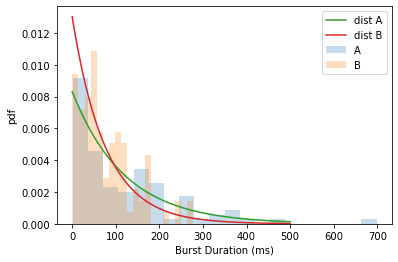

In [9]:
distA = st.expon(loc=0, scale=burstDurationsA_ms.mean())
distB = st.expon(loc=0, scale=burstDurationsB_ms.mean())

plt.hist(burstDurationsA_ms, bins=20, density=True, alpha=0.25, label='A')
plt.hist(burstDurationsB_ms, bins=20, density=True, alpha=0.25, label='B')
dur_ms = np.linspace(0, 500, 100)
plt.plot(dur_ms, distA.pdf(dur_ms), label='dist A')
plt.plot(dur_ms, distB.pdf(dur_ms), label='dist B')
plt.xlabel('Burst Duration (ms)')
plt.ylabel('pdf')
plt.legend();

1c. (3 pts) Use a permutation test with 1000 permutations to test your null hypothesis. Compute the difference between mean burst durations for all 1000 permutations of the datasets.

In [11]:
nA = len(burstDurationsA_ms)
nB = len(burstDurationsB_ms)

allBurstDurations = np.zeros((nA + nB,))
allBurstDurations[:nA] = burstDurationsA_ms
allBurstDurations[-nB:] = burstDurationsB_ms

numPermutations = 1000
permutedMeanBurstDurationDiffs = np.zeros((numPermutations,))

for i in range(numPermutations):
    np.random.shuffle(allBurstDurations)
    
    permutedBurstDurationsA = allBurstDurations[:nA]
    permutedBurstDurationsB = allBurstDurations[-nB:]
    
    permutedMeanBurstDurationDiffs[i] = permutedBurstDurationsB.mean() - permutedBurstDurationsA.mean()

1d. (3 pts) Plot the distribtuion of mean burst time differences from each permutation and use vertical dashed lines ot indicate the 95% confidence interval and a vertical solid line to indicate the measured mean burst time difference between the actual datasets. Finally, answer the original question, do the conditions affect mean burst duration?

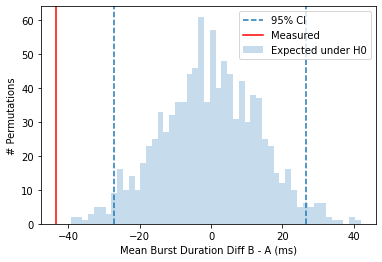

In [12]:
# plot the distribution differences between taus for each permutation
plt.hist(permutedMeanBurstDurationDiffs, bins=50, alpha=0.25, label='Expected under H0');
plt.xlabel('Mean Burst Duration Diff B - A (ms)')
plt.ylabel('# Permutations');

# add 95% confidence intervals to the plot
lb, ub = np.quantile(permutedMeanBurstDurationDiffs, [0.025, 0.975])
plt.axvline(lb, linestyle='--', label='95% CI')
plt.axvline(ub, linestyle='--');

# add measured difference to plot
measuredMeanBurstDurationDiff = burstDurationsB_ms.mean() - burstDurationsA_ms.mean()
plt.axvline(measuredMeanBurstDurationDiff, color='r', label='Measured')

plt.legend();

Reject H0 as measured difference falls outside of 95% confidence interval for expected differenece if H0 was true.

Thus, we infer that condition B did affect the mean burst duration as compared to condition A.

2. You record the resting potential of a cell (see below). See 2a-c below.

In [14]:
restingPotential_mV = np.array([-85.06885608, -68.0333149 , -77.04147864, -70.82636201,
       -73.11516394, -70.87124656, -69.8945143 , -71.35017797,
       -78.97700081, -76.06762065, -80.16301496, -75.53757879,
       -66.29208026, -84.46635021, -74.99594162, -81.64926101,
       -69.43971079, -60.09946296, -66.79822251, -60.85633766,
       -54.32637416, -66.45195357, -82.98456323, -81.95661922,
       -60.47209247, -80.55272128, -62.85999264, -86.59379859,
       -78.64488589, -68.84506935, -80.77647186, -67.85623328,
       -74.45114227, -89.65579119, -82.64751201, -63.75968145,
       -74.22283582, -59.31586296, -93.0908073 , -73.64374549,
       -62.68738212, -57.96506437, -72.3717666 , -86.33058942,
       -78.92751452, -58.80136699, -85.71378949, -57.19191734,
       -91.30229149, -75.05287933, -75.33300218, -62.74969485,
       -79.59156555, -52.61256484, -77.21434863, -83.18228806,
       -62.06267252, -68.56599363, -74.33860286, -74.25433867,
       -67.10062548, -70.91001388, -74.54319772, -89.15247536,
       -72.25311527, -88.42966306, -77.76328165, -68.46582471,
       -75.94389499, -58.47565688, -71.13726886, -82.4352595 ,
       -61.93586705, -83.83289675, -51.7473573 , -72.18052423,
       -77.19392687, -87.97762782, -68.17409172, -62.04925685,
       -72.86214908, -69.43243604, -82.89191418, -67.91943956,
       -59.00530849, -62.53955662, -68.66192422, -73.86176431,
       -63.33605874, -84.78928316, -79.38590405, -85.06698722,
       -77.99176887, -70.8097979 , -70.458364  , -77.83905415,
       -79.05549124, -67.7530506 , -86.29135786, -60.87285052,
       -68.75028368, -69.48216823, -87.97546221, -74.25401398,
       -72.00639248, -73.25242423, -99.49034043, -81.86020062,
       -78.38191113, -68.64333415, -62.26209287, -75.46279644,
       -82.18768283, -77.45752358, -79.82870353, -69.4572625 ,
       -78.32253067, -73.59782921, -72.25046001, -80.64590368,
       -76.92874101, -90.79517065, -73.90324566, -81.67875556,
       -67.59862905, -81.49491813, -75.79660561, -81.14508062,
       -78.95641057, -80.56089537, -80.23390812, -72.4244641 ,
       -87.47818531, -73.59907449, -66.92882851, -67.87048944,
       -69.79223622, -67.11253617, -64.8935525 , -80.52556846,
       -78.19259758, -62.10604477, -95.98603544, -75.95599522,
       -66.3355366 , -80.87436998, -81.5009947 , -88.22430255,
       -83.72971765, -75.86416506, -82.52663772, -53.76916602,
       -66.21196557, -72.93868097, -91.42283677, -80.22444843,
       -75.08391826, -52.05541454, -72.0154604 , -80.24943593,
       -65.97047566, -81.62631839, -73.18646105, -70.85923137,
       -66.05248632, -60.82923084, -59.49883812, -78.38967591,
       -84.79797173, -95.00305539, -78.06355062, -71.60393851,
       -70.37115932, -86.7155815 , -65.38955127, -76.78546928,
       -79.85586826, -76.65572665, -71.50214043, -83.65681821,
       -59.9250123 , -76.05986927, -82.68107711, -70.01703154,
       -74.46337865, -63.38903087, -78.73136431, -76.56253395,
       -72.43137511, -52.60067507, -54.23945626, -63.68117735,
       -88.19424095, -76.29322833, -77.01457066, -72.88256829,
       -67.46931905, -60.91331725, -79.17094879, -74.96126989])

2a. (3 pts) You only have one sample (above) with a single mean. Use the Central Limit Theorem to estimate the distribution of mean resting potentials were you to collect a bunch more samples. Plot this distribution and indicate its 95% confidence interval with vertical lines on the plot.

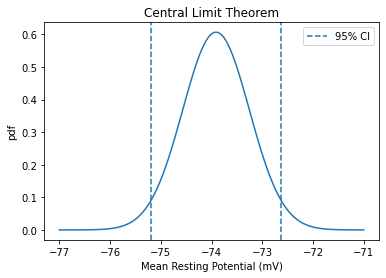

In [27]:
mu = restingPotential_mV.mean()
sem = restingPotential_mV.std() / np.sqrt(len(restingPotential_mV))

meanDist = st.norm(mu, sem)
mV = np.linspace(-77, -71, 101)
plt.plot(mV, meanDist.pdf(mV))
plt.xlabel('Mean Resting Potential (mV)')
plt.ylabel('pdf')
plt.title('Central Limit Theorem')
lb, ub = meanDist.ppf([0.025, 0.975])
plt.axvline(lb, linestyle='--', label='95% CI')
plt.axvline(ub, linestyle='--')
plt.legend();

2b. (3 pts) Use 1000 bootstrapped samples to estimate the 95% confidence interval for the mean resting potential. Plot the distribution of bootstrap mean resting potentials and indicate the 95% confidence intervals with vertical lines. How do these compare to that obtained by the Central Limit Theorem?

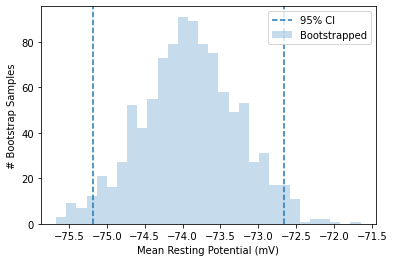

In [25]:
numBootstraps = 1000
bootstrappedMeans = np.zeros((numBootstraps,))
for i in range(numBootstraps):
    bootstrappedRestingPotentials_mV = \
        np.random.choice(restingPotential_mV, size=restingPotential_mV.shape, replace=True)
    bootstrappedMeans[i] = bootstrappedRestingPotentials_mV.mean()

bootstrappedMeansCI = np.quantile(bootstrappedMeans, [0.025, 0.975])

plt.hist(bootstrappedMeans, bins=30, alpha=0.25, label='Bootstrapped')
plt.axvline(bootstrappedMeansCI[0], linestyle='--', label='95% CI')
plt.axvline(bootstrappedMeansCI[1], linestyle='--')
plt.xlabel('Mean Resting Potential (mV)')
plt.ylabel('# Bootstrap Samples')
plt.legend();

2c. (3 pts) Use a t-Test to determine whether this cell belongs to a set of cells that you previously determined have a resting potential of -60 mV?

In [32]:
# I didn't specifically ask for the normality test, so it is ok if it was not included.
# But you should do some sort of check for normality if you are using a t-Test.
stat, pvalue = st.normaltest(restingPotential_mV)
isNormallyDistributed = pvalue >= 0.05
isNormallyDistributed

True

In [33]:
t, pvalue = st.ttest_1samp(restingPotential_mV, -60)
pvalue

1.0774527854947189e-52